# INTRODUCTION

With this retail seller dataset with the goal of predicting the sales with features such as Region, State, Sales Method, Product Gender and retailer. On this project we will try to predict a numerical value (sales) with categorial variables. This with the mission of keeping away numbers that are highly correlated with the y value.

# IMPORTING LIBRARIES AND DATASET

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_excel("adidas.xlsx")
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,Men,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,Men,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,Women,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,Women,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,Men,60.0,900,540000.0,162000.0,0.30,In-store


In [3]:
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   Product           9648 non-null   object        
 6   Price per Unit    9648 non-null   float64       
 7   Units Sold        9648 non-null   int64         
 8   Total Sales       9648 non-null   float64       
 9   Operating Profit  9648 non-null   float64       
 10  Operating Margin  9648 non-null   float64       
 11  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 904.6+ KB


### Checking null values

In [5]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

### Plotting the most frequent Retailers

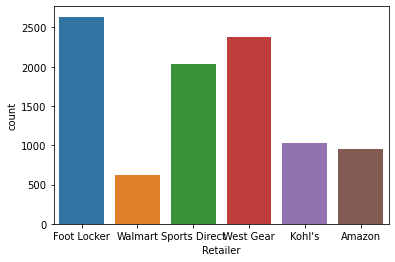

In [6]:
sns.countplot(df["Retailer"])
plt.show()

### Plotting the most frequent Regions

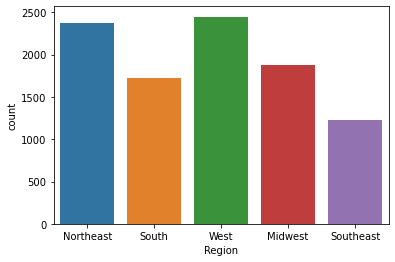

In [7]:
sns.countplot(df["Region"])
plt.show()

### Plotting the most frequent Gender

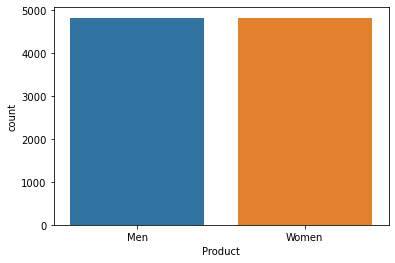

In [8]:
sns.countplot(df["Product"])
plt.show()

### Plotting the most frequent Sales Method

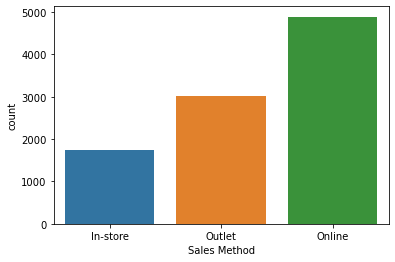

In [9]:
sns.countplot(df["Sales Method"])
plt.show()

### Plotting the correlation heatmap

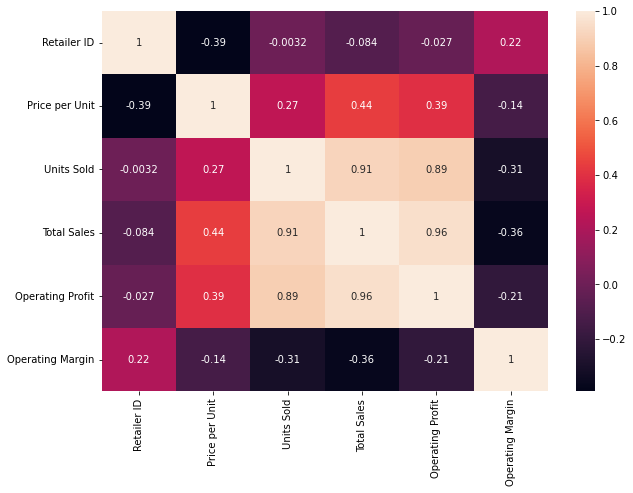

In [11]:
plt.figure(figsize=(10,7))
df_corr = df.corr()
sns.heatmap(df_corr, annot = True)
plt.show()

### Plotting the correlation between Operating Profit vs. Total Sales by Region

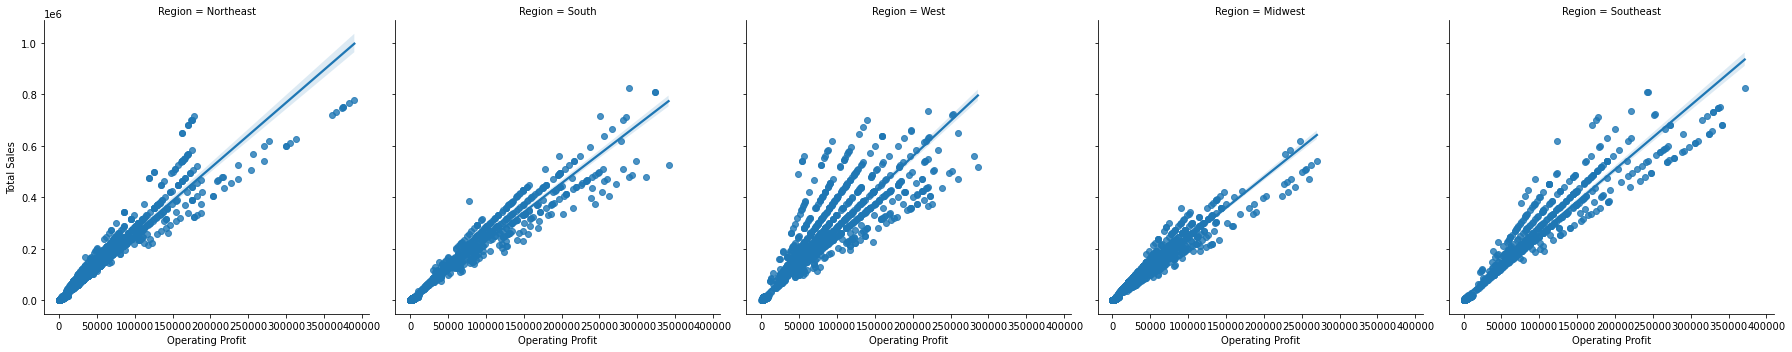

In [12]:
sns.lmplot("Operating Profit", "Total Sales", data = df, col = "Region")

### Plotting the distribution of the variable of units sold

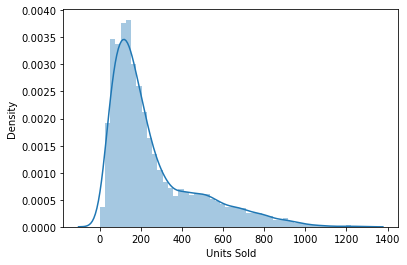

In [13]:
sns.distplot(df["Units Sold"])
plt.show()

### Plotting the outliers of the Sales Method

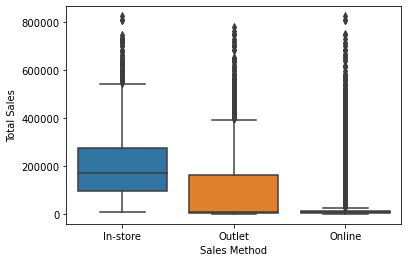

In [14]:
sns.boxplot("Sales Method", "Total Sales", data = df)
plt.show()

# ETL

### Dropping all columns that we are not going to use

In [15]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'Product',
       'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit',
       'Operating Margin', 'Sales Method'],
      dtype='object')

In [16]:
df = df.drop(["Invoice Date","Retailer ID","Price per Unit", "Operating Profit",'Units Sold','Operating Margin'], axis =1)
df.head()

,Retailer,Region,State,Product,Total Sales,Sales Method
0,Foot Locker,Northeast,New York,Men,600000.0,In-store
1,Foot Locker,Northeast,New York,Men,500000.0,In-store
2,Foot Locker,Northeast,New York,Women,400000.0,In-store
3,Foot Locker,Northeast,New York,Women,382500.0,In-store
4,Foot Locker,Northeast,New York,Men,540000.0,In-store


In [17]:
df = pd.get_dummies(df)
df.head()

,Total Sales,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,Retailer_Sports Direct,Retailer_Walmart,Retailer_West Gear,Region_Midwest,Region_Northeast,Region_South,...,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Product_Men,Product_Women,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
0,600000.0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,500000.0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,400000.0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,382500.0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,540000.0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


# MACHINE LEARNING

### Splitting the dataset into dependent and independet variables, and then between Train and Testing

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop("Total Sales", axis = 1)
y = df["Total Sales"]

X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.25, random_state=101)

### Training the model

In [19]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

### Making predictions

In [20]:
predictions = lm.predict(X_test)

### Plotting the real value vs. predicted values to find visualily a correlation

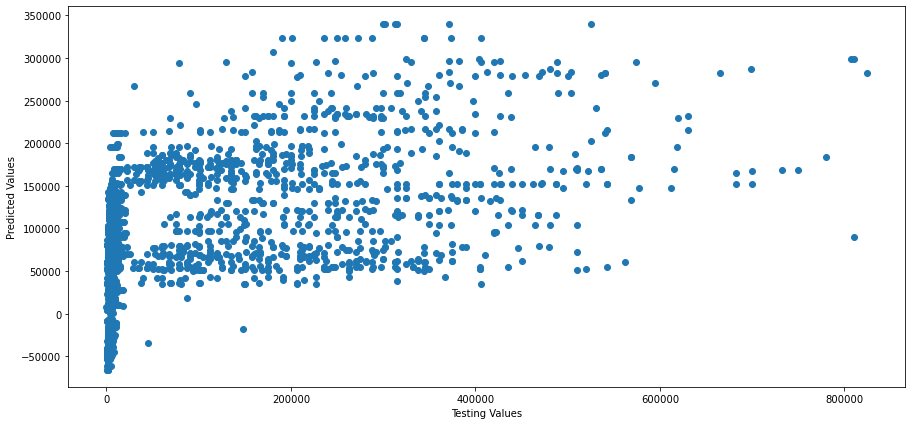

In [27]:
plt.figure(figsize=(15,7))
plt.scatter(y_test, predictions)
plt.xlabel("Testing Values")
plt.ylabel("Predicted Values")
plt.show()

### Getting the performance of the model

In [24]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("MSE: ", metrics.mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("Variance Score: ", round(100*(metrics.explained_variance_score(y_test, predictions)),2),"%")

MSE:  14645572003.412935
RMSE:  121018.89110140175
MAE:  88460.46517412935
Variance Score:  27.62 %


### Getting the residuals (erros) of the model

<Figure size 1080x504 with 0 Axes>

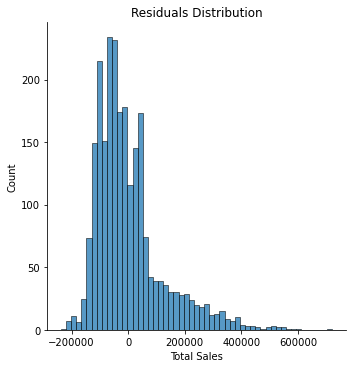

In [29]:
plt.figure(figsize=(15,7))
sns.displot((y_test-predictions))
plt.title("Residuals Distribution")
plt.show()

# CONCLUSIONS

With a low variance score and a high RMSE, it is pretty hard to predict the Total Sales depending on categorical variables, so I do not recommend this model with this dataset to predict y